In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.utils import shuffle

history={'loss':[]}

# 1.初始化参数
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)

    # 权重和偏置矩阵
    w1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))

    # 通过字典存储参数
    parameters = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

    return parameters


# 2.前向传播
def forward_propagation(X, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    # 通过前向传播来计算a2
    z1 = np.dot(w1, X) + b1     # 这个地方需注意矩阵加法：虽然(w1*X)和b1的维度不同，但可以相加
    a1 = np.tanh(z1)            # 使用tanh作为第一层的激活函数
    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))  # 使用sigmoid作为第二层的激活函数

    # 通过字典存储参数
    cache = {'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2}

    return a2, cache


# 3.计算代价函数
def compute_cost(a2, Y, parameters):
    m = Y.shape[1]      # Y的列数即为总的样本数

    # 采用交叉熵（cross-entropy）作为代价函数
    logprobs = np.multiply(np.log(a2), Y) + np.multiply((1 - Y), np.log(1 - a2))
    cost = - np.sum(logprobs) / m

    return cost


# 4.反向传播（计算代价函数的导数）
def backward_propagation(parameters, cache, X, Y):
    m = Y.shape[1]

    w2 = parameters['w2']

    a1 = cache['a1']
    a2 = cache['a2']

    # 反向传播，计算dw1、db1、dw2、db2
    dz2 = a2 - Y
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.multiply(np.dot(w2.T, dz2), 1 - np.power(a1, 2))
    dw1 = (1 / m) * np.dot(dz1, X.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)

    grads = {'dw1': dw1, 'db1': db1, 'dw2': dw2, 'db2': db2}

    return grads


# 5.更新参数
def update_parameters(parameters, grads, learning_rate=0.0075):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = grads['dw1']
    db1 = grads['db1']
    dw2 = grads['dw2']
    db2 = grads['db2']

    # 更新参数
    w1 = w1 - dw1 * learning_rate
    b1 = b1 - db1 * learning_rate
    w2 = w2 - dw2 * learning_rate
    b2 = b2 - db2 * learning_rate

    parameters = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

    return parameters


# 建立神经网络
def nn_model(X, Y, n_h, n_input, n_output, num_iterations=10000, print_cost=False):
    np.random.seed(3)

    n_x = n_input           # 输入层节点数
    n_y = n_output          # 输出层节点数

    # 1.初始化参数
    parameters = initialize_parameters(n_x, n_h, n_y)

    # 梯度下降循环
    for i in range(0, num_iterations):
        # 2.前向传播
        a2, cache = forward_propagation(X, parameters)
        # 3.计算代价函数
        cost = compute_cost(a2, Y, parameters)
        # 4.反向传播
        grads = backward_propagation(parameters, cache, X, Y)
        # 5.更新参数
        parameters = update_parameters(parameters, grads)

        # 每1000次迭代，输出一次代价函数
        if print_cost and i % 1 == 0:
            print('迭代第%i次，代价函数为：%f' % (i, cost))
            history['loss'].append(cost)

    return parameters


# 对模型进行测试
def predict(parameters, x_test, y_test):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x_test) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))

    # 结果的维度
    n_rows = y_test.shape[0]
    n_cols = y_test.shape[1]

    # 预测值结果存储
    output = np.empty(shape=(n_rows, n_cols), dtype=int)

    # 取出每条测试数据的预测结果
    for i in range(n_cols):
        # 将每条测试数据的预测结果（概率）存为一个行向量
        temp = np.zeros(shape=n_rows)
        for j in range(n_rows):
            temp[j] = a2[j][i]

        # 将每条结果（概率）从小到大排序，并获得相应下标
        sorted_dist = np.argsort(temp)
        length = len(sorted_dist)

        # 将概率最大的置为1，其它置为0
        for k in range(length):
            if k == sorted_dist[length - 1]:
                output[k][i] = 1
            else:
                output[k][i] = 0

    print('预测结果：')
    print(output)
    print('真实结果：')
    print(y_test)

    count = 0
    for k in range(0, n_cols):
        if output[0][k] == y_test[0][k] and output[1][k] == y_test[1][k] and output[2][k] == y_test[2][k]:
            count = count + 1

    acc = count / int(y_test.shape[1]) * 100
    print('准确率：%.2f%%' % acc)
    
# 构造绘图函数
from matplotlib import pyplot as plt
def drow(history):
    epochs = range(1, len(history['loss']) + 1)
    plt.plot(epochs, history['loss'], 'r', label='loss')
    plt.title('Training loss')
    plt.xlabel('Times')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('cmc/cmc.data', header = None)
df=df.astype(int)
data=df.values
data

array([[24,  2,  3, ...,  3,  0,  1],
       [45,  1,  3, ...,  4,  0,  1],
       [43,  2,  3, ...,  4,  0,  1],
       ...,
       [39,  3,  3, ...,  4,  0,  3],
       [33,  3,  3, ...,  2,  0,  3],
       [17,  3,  3, ...,  4,  0,  3]])

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(data[:,0:9],data[:,9], test_size=test_size, random_state=seed)
y_train = tf.one_hot(y_train,3)
y_test = tf.one_hot(y_test,3)
# 做了转置，将列转置为行
X_train=X_train.T 
X_test=X_test.T 
sess=tf.Session()
y_test=y_test.eval(session=sess).T 
y_train=y_train.eval(session=sess).T 

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
# 开始训练
start_time = datetime.datetime.now()
# 输入12个节点，隐层6个节点，输出3个节点，迭代10000次
parameters = nn_model(X_train, y_train, n_h=12, n_input=9, n_output=3, num_iterations=10000, print_cost=True)
end_time = datetime.datetime.now()
print("用时：" + str((end_time - start_time).seconds) + 's' + str(round((end_time - start_time).microseconds / 1000)) + 'ms')

迭代第0次，代价函数为：2.090228
迭代第1次，代价函数为：2.083138
迭代第2次，代价函数为：2.076416
迭代第3次，代价函数为：2.069878
迭代第4次，代价函数为：2.063356
迭代第5次，代价函数为：2.056693
迭代第6次，代价函数为：2.049745
迭代第7次，代价函数为：2.042386
迭代第8次，代价函数为：2.034508
迭代第9次，代价函数为：2.026021
迭代第10次，代价函数为：2.016858
迭代第11次，代价函数为：2.006971
迭代第12次，代价函数为：1.996336
迭代第13次，代价函数为：1.984946
迭代第14次，代价函数为：1.972815
迭代第15次，代价函数为：1.959976
迭代第16次，代价函数为：1.946481
迭代第17次，代价函数为：1.932398
迭代第18次，代价函数为：1.917808
迭代第19次，代价函数为：1.902804
迭代第20次，代价函数为：1.887485
迭代第21次，代价函数为：1.871953
迭代第22次，代价函数为：1.856305
迭代第23次，代价函数为：1.840635
迭代第24次，代价函数为：1.825029
迭代第25次，代价函数为：1.809562
迭代第26次，代价函数为：1.794301
迭代第27次，代价函数为：1.779301
迭代第28次，代价函数为：1.764606
迭代第29次，代价函数为：1.750253
迭代第30次，代价函数为：1.736268
迭代第31次，代价函数为：1.722672
迭代第32次，代价函数为：1.709476
迭代第33次，代价函数为：1.696689
迭代第34次，代价函数为：1.684313
迭代第35次，代价函数为：1.672346
迭代第36次，代价函数为：1.660785
迭代第37次，代价函数为：1.649623
迭代第38次，代价函数为：1.638852
迭代第39次，代价函数为：1.628461
迭代第40次，代价函数为：1.618441
迭代第41次，代价函数为：1.608779
迭代第42次，代价函数为：1.599463
迭代第43次，代价函数为：1.590482
迭代第44次，代价函数为：1.581824
迭代第45次，代价函数为：1.57347

迭代第404次，代价函数为：1.257074
迭代第405次，代价函数为：1.257000
迭代第406次，代价函数为：1.256925
迭代第407次，代价函数为：1.256852
迭代第408次，代价函数为：1.256778
迭代第409次，代价函数为：1.256705
迭代第410次，代价函数为：1.256632
迭代第411次，代价函数为：1.256560
迭代第412次，代价函数为：1.256488
迭代第413次，代价函数为：1.256416
迭代第414次，代价函数为：1.256345
迭代第415次，代价函数为：1.256274
迭代第416次，代价函数为：1.256203
迭代第417次，代价函数为：1.256133
迭代第418次，代价函数为：1.256063
迭代第419次，代价函数为：1.255994
迭代第420次，代价函数为：1.255925
迭代第421次，代价函数为：1.255856
迭代第422次，代价函数为：1.255787
迭代第423次，代价函数为：1.255719
迭代第424次，代价函数为：1.255651
迭代第425次，代价函数为：1.255584
迭代第426次，代价函数为：1.255517
迭代第427次，代价函数为：1.255450
迭代第428次，代价函数为：1.255384
迭代第429次，代价函数为：1.255318
迭代第430次，代价函数为：1.255252
迭代第431次，代价函数为：1.255186
迭代第432次，代价函数为：1.255121
迭代第433次，代价函数为：1.255056
迭代第434次，代价函数为：1.254992
迭代第435次，代价函数为：1.254927
迭代第436次，代价函数为：1.254864
迭代第437次，代价函数为：1.254800
迭代第438次，代价函数为：1.254737
迭代第439次，代价函数为：1.254674
迭代第440次，代价函数为：1.254611
迭代第441次，代价函数为：1.254549
迭代第442次，代价函数为：1.254486
迭代第443次，代价函数为：1.254425
迭代第444次，代价函数为：1.254363
迭代第445次，代价函数为：1.254302
迭代第446次，代价函数为：1.254241
迭代第447次，代价函

迭代第796次，代价函数为：1.242600
迭代第797次，代价函数为：1.242582
迭代第798次，代价函数为：1.242564
迭代第799次，代价函数为：1.242546
迭代第800次，代价函数为：1.242528
迭代第801次，代价函数为：1.242510
迭代第802次，代价函数为：1.242492
迭代第803次，代价函数为：1.242474
迭代第804次，代价函数为：1.242457
迭代第805次，代价函数为：1.242439
迭代第806次，代价函数为：1.242421
迭代第807次，代价函数为：1.242403
迭代第808次，代价函数为：1.242386
迭代第809次，代价函数为：1.242368
迭代第810次，代价函数为：1.242351
迭代第811次，代价函数为：1.242333
迭代第812次，代价函数为：1.242316
迭代第813次，代价函数为：1.242298
迭代第814次，代价函数为：1.242281
迭代第815次，代价函数为：1.242264
迭代第816次，代价函数为：1.242246
迭代第817次，代价函数为：1.242229
迭代第818次，代价函数为：1.242212
迭代第819次，代价函数为：1.242195
迭代第820次，代价函数为：1.242178
迭代第821次，代价函数为：1.242161
迭代第822次，代价函数为：1.242143
迭代第823次，代价函数为：1.242127
迭代第824次，代价函数为：1.242110
迭代第825次，代价函数为：1.242093
迭代第826次，代价函数为：1.242076
迭代第827次，代价函数为：1.242059
迭代第828次，代价函数为：1.242042
迭代第829次，代价函数为：1.242026
迭代第830次，代价函数为：1.242009
迭代第831次，代价函数为：1.241992
迭代第832次，代价函数为：1.241976
迭代第833次，代价函数为：1.241959
迭代第834次，代价函数为：1.241943
迭代第835次，代价函数为：1.241926
迭代第836次，代价函数为：1.241910
迭代第837次，代价函数为：1.241893
迭代第838次，代价函数为：1.241877
迭代第839次，代价函

迭代第1196次，代价函数为：1.237821
迭代第1197次，代价函数为：1.237814
迭代第1198次，代价函数为：1.237806
迭代第1199次，代价函数为：1.237798
迭代第1200次，代价函数为：1.237790
迭代第1201次，代价函数为：1.237782
迭代第1202次，代价函数为：1.237775
迭代第1203次，代价函数为：1.237767
迭代第1204次，代价函数为：1.237759
迭代第1205次，代价函数为：1.237751
迭代第1206次，代价函数为：1.237744
迭代第1207次，代价函数为：1.237736
迭代第1208次，代价函数为：1.237728
迭代第1209次，代价函数为：1.237720
迭代第1210次，代价函数为：1.237713
迭代第1211次，代价函数为：1.237705
迭代第1212次，代价函数为：1.237697
迭代第1213次，代价函数为：1.237690
迭代第1214次，代价函数为：1.237682
迭代第1215次，代价函数为：1.237675
迭代第1216次，代价函数为：1.237667
迭代第1217次，代价函数为：1.237659
迭代第1218次，代价函数为：1.237652
迭代第1219次，代价函数为：1.237644
迭代第1220次，代价函数为：1.237637
迭代第1221次，代价函数为：1.237629
迭代第1222次，代价函数为：1.237622
迭代第1223次，代价函数为：1.237614
迭代第1224次，代价函数为：1.237607
迭代第1225次，代价函数为：1.237599
迭代第1226次，代价函数为：1.237592
迭代第1227次，代价函数为：1.237584
迭代第1228次，代价函数为：1.237577
迭代第1229次，代价函数为：1.237569
迭代第1230次，代价函数为：1.237562
迭代第1231次，代价函数为：1.237555
迭代第1232次，代价函数为：1.237547
迭代第1233次，代价函数为：1.237540
迭代第1234次，代价函数为：1.237532
迭代第1235次，代价函数为：1.237525
迭代第1236次，代价函数为：1.237518
迭代第1237次，代价函数为：1

迭代第1549次，代价函数为：1.235692
迭代第1550次，代价函数为：1.235688
迭代第1551次，代价函数为：1.235683
迭代第1552次，代价函数为：1.235679
迭代第1553次，代价函数为：1.235674
迭代第1554次，代价函数为：1.235669
迭代第1555次，代价函数为：1.235665
迭代第1556次，代价函数为：1.235660
迭代第1557次，代价函数为：1.235656
迭代第1558次，代价函数为：1.235651
迭代第1559次，代价函数为：1.235646
迭代第1560次，代价函数为：1.235642
迭代第1561次，代价函数为：1.235637
迭代第1562次，代价函数为：1.235633
迭代第1563次，代价函数为：1.235628
迭代第1564次，代价函数为：1.235624
迭代第1565次，代价函数为：1.235619
迭代第1566次，代价函数为：1.235615
迭代第1567次，代价函数为：1.235610
迭代第1568次，代价函数为：1.235606
迭代第1569次，代价函数为：1.235601
迭代第1570次，代价函数为：1.235597
迭代第1571次，代价函数为：1.235592
迭代第1572次，代价函数为：1.235588
迭代第1573次，代价函数为：1.235583
迭代第1574次，代价函数为：1.235579
迭代第1575次，代价函数为：1.235574
迭代第1576次，代价函数为：1.235570
迭代第1577次，代价函数为：1.235565
迭代第1578次，代价函数为：1.235561
迭代第1579次，代价函数为：1.235556
迭代第1580次，代价函数为：1.235552
迭代第1581次，代价函数为：1.235547
迭代第1582次，代价函数为：1.235543
迭代第1583次，代价函数为：1.235538
迭代第1584次，代价函数为：1.235534
迭代第1585次，代价函数为：1.235530
迭代第1586次，代价函数为：1.235525
迭代第1587次，代价函数为：1.235521
迭代第1588次，代价函数为：1.235516
迭代第1589次，代价函数为：1.235512
迭代第1590次，代价函数为：1

迭代第1931次，代价函数为：1.234279
迭代第1932次，代价函数为：1.234276
迭代第1933次，代价函数为：1.234273
迭代第1934次，代价函数为：1.234270
迭代第1935次，代价函数为：1.234267
迭代第1936次，代价函数为：1.234264
迭代第1937次，代价函数为：1.234261
迭代第1938次，代价函数为：1.234258
迭代第1939次，代价函数为：1.234255
迭代第1940次，代价函数为：1.234252
迭代第1941次，代价函数为：1.234249
迭代第1942次，代价函数为：1.234246
迭代第1943次，代价函数为：1.234244
迭代第1944次，代价函数为：1.234241
迭代第1945次，代价函数为：1.234238
迭代第1946次，代价函数为：1.234235
迭代第1947次，代价函数为：1.234232
迭代第1948次，代价函数为：1.234229
迭代第1949次，代价函数为：1.234226
迭代第1950次，代价函数为：1.234223
迭代第1951次，代价函数为：1.234220
迭代第1952次，代价函数为：1.234217
迭代第1953次，代价函数为：1.234214
迭代第1954次，代价函数为：1.234212
迭代第1955次，代价函数为：1.234209
迭代第1956次，代价函数为：1.234206
迭代第1957次，代价函数为：1.234203
迭代第1958次，代价函数为：1.234200
迭代第1959次，代价函数为：1.234197
迭代第1960次，代价函数为：1.234194
迭代第1961次，代价函数为：1.234191
迭代第1962次，代价函数为：1.234189
迭代第1963次，代价函数为：1.234186
迭代第1964次，代价函数为：1.234183
迭代第1965次，代价函数为：1.234180
迭代第1966次，代价函数为：1.234177
迭代第1967次，代价函数为：1.234174
迭代第1968次，代价函数为：1.234171
迭代第1969次，代价函数为：1.234169
迭代第1970次，代价函数为：1.234166
迭代第1971次，代价函数为：1.234163
迭代第1972次，代价函数为：1

迭代第2333次，代价函数为：1.233297
迭代第2334次，代价函数为：1.233295
迭代第2335次，代价函数为：1.233293
迭代第2336次，代价函数为：1.233291
迭代第2337次，代价函数为：1.233289
迭代第2338次，代价函数为：1.233287
迭代第2339次，代价函数为：1.233285
迭代第2340次，代价函数为：1.233283
迭代第2341次，代价函数为：1.233281
迭代第2342次，代价函数为：1.233279
迭代第2343次，代价函数为：1.233277
迭代第2344次，代价函数为：1.233275
迭代第2345次，代价函数为：1.233273
迭代第2346次，代价函数为：1.233271
迭代第2347次，代价函数为：1.233269
迭代第2348次，代价函数为：1.233267
迭代第2349次，代价函数为：1.233265
迭代第2350次，代价函数为：1.233263
迭代第2351次，代价函数为：1.233261
迭代第2352次，代价函数为：1.233259
迭代第2353次，代价函数为：1.233257
迭代第2354次，代价函数为：1.233255
迭代第2355次，代价函数为：1.233253
迭代第2356次，代价函数为：1.233251
迭代第2357次，代价函数为：1.233249
迭代第2358次，代价函数为：1.233247
迭代第2359次，代价函数为：1.233245
迭代第2360次，代价函数为：1.233243
迭代第2361次，代价函数为：1.233241
迭代第2362次，代价函数为：1.233239
迭代第2363次，代价函数为：1.233238
迭代第2364次，代价函数为：1.233236
迭代第2365次，代价函数为：1.233234
迭代第2366次，代价函数为：1.233232
迭代第2367次，代价函数为：1.233230
迭代第2368次，代价函数为：1.233228
迭代第2369次，代价函数为：1.233226
迭代第2370次，代价函数为：1.233224
迭代第2371次，代价函数为：1.233222
迭代第2372次，代价函数为：1.233220
迭代第2373次，代价函数为：1.233218
迭代第2374次，代价函数为：1

迭代第2701次，代价函数为：1.232657
迭代第2702次，代价函数为：1.232656
迭代第2703次，代价函数为：1.232655
迭代第2704次，代价函数为：1.232653
迭代第2705次，代价函数为：1.232652
迭代第2706次，代价函数为：1.232650
迭代第2707次，代价函数为：1.232649
迭代第2708次，代价函数为：1.232647
迭代第2709次，代价函数为：1.232646
迭代第2710次，代价函数为：1.232644
迭代第2711次，代价函数为：1.232643
迭代第2712次，代价函数为：1.232641
迭代第2713次，代价函数为：1.232640
迭代第2714次，代价函数为：1.232638
迭代第2715次，代价函数为：1.232637
迭代第2716次，代价函数为：1.232635
迭代第2717次，代价函数为：1.232634
迭代第2718次，代价函数为：1.232632
迭代第2719次，代价函数为：1.232631
迭代第2720次，代价函数为：1.232629
迭代第2721次，代价函数为：1.232628
迭代第2722次，代价函数为：1.232626
迭代第2723次，代价函数为：1.232625
迭代第2724次，代价函数为：1.232623
迭代第2725次，代价函数为：1.232622
迭代第2726次，代价函数为：1.232620
迭代第2727次，代价函数为：1.232619
迭代第2728次，代价函数为：1.232617
迭代第2729次，代价函数为：1.232616
迭代第2730次，代价函数为：1.232614
迭代第2731次，代价函数为：1.232613
迭代第2732次，代价函数为：1.232612
迭代第2733次，代价函数为：1.232610
迭代第2734次，代价函数为：1.232609
迭代第2735次，代价函数为：1.232607
迭代第2736次，代价函数为：1.232606
迭代第2737次，代价函数为：1.232604
迭代第2738次，代价函数为：1.232603
迭代第2739次，代价函数为：1.232601
迭代第2740次，代价函数为：1.232600
迭代第2741次，代价函数为：1.232598
迭代第2742次，代价函数为：1

迭代第3101次，代价函数为：1.232136
迭代第3102次，代价函数为：1.232135
迭代第3103次，代价函数为：1.232134
迭代第3104次，代价函数为：1.232132
迭代第3105次，代价函数为：1.232131
迭代第3106次，代价函数为：1.232130
迭代第3107次，代价函数为：1.232129
迭代第3108次，代价函数为：1.232128
迭代第3109次，代价函数为：1.232127
迭代第3110次，代价函数为：1.232126
迭代第3111次，代价函数为：1.232125
迭代第3112次，代价函数为：1.232123
迭代第3113次，代价函数为：1.232122
迭代第3114次，代价函数为：1.232121
迭代第3115次，代价函数为：1.232120
迭代第3116次，代价函数为：1.232119
迭代第3117次，代价函数为：1.232118
迭代第3118次，代价函数为：1.232117
迭代第3119次，代价函数为：1.232116
迭代第3120次，代价函数为：1.232114
迭代第3121次，代价函数为：1.232113
迭代第3122次，代价函数为：1.232112
迭代第3123次，代价函数为：1.232111
迭代第3124次，代价函数为：1.232110
迭代第3125次，代价函数为：1.232109
迭代第3126次，代价函数为：1.232108
迭代第3127次，代价函数为：1.232107
迭代第3128次，代价函数为：1.232105
迭代第3129次，代价函数为：1.232104
迭代第3130次，代价函数为：1.232103
迭代第3131次，代价函数为：1.232102
迭代第3132次，代价函数为：1.232101
迭代第3133次，代价函数为：1.232100
迭代第3134次，代价函数为：1.232099
迭代第3135次，代价函数为：1.232098
迭代第3136次，代价函数为：1.232097
迭代第3137次，代价函数为：1.232095
迭代第3138次，代价函数为：1.232094
迭代第3139次，代价函数为：1.232093
迭代第3140次，代价函数为：1.232092
迭代第3141次，代价函数为：1.232091
迭代第3142次，代价函数为：1

迭代第3458次，代价函数为：1.231773
迭代第3459次，代价函数为：1.231772
迭代第3460次，代价函数为：1.231771
迭代第3461次，代价函数为：1.231770
迭代第3462次，代价函数为：1.231769
迭代第3463次，代价函数为：1.231768
迭代第3464次，代价函数为：1.231767
迭代第3465次，代价函数为：1.231766
迭代第3466次，代价函数为：1.231766
迭代第3467次，代价函数为：1.231765
迭代第3468次，代价函数为：1.231764
迭代第3469次，代价函数为：1.231763
迭代第3470次，代价函数为：1.231762
迭代第3471次，代价函数为：1.231761
迭代第3472次，代价函数为：1.231760
迭代第3473次，代价函数为：1.231759
迭代第3474次，代价函数为：1.231758
迭代第3475次，代价函数为：1.231757
迭代第3476次，代价函数为：1.231757
迭代第3477次，代价函数为：1.231756
迭代第3478次，代价函数为：1.231755
迭代第3479次，代价函数为：1.231754
迭代第3480次，代价函数为：1.231753
迭代第3481次，代价函数为：1.231752
迭代第3482次，代价函数为：1.231751
迭代第3483次，代价函数为：1.231750
迭代第3484次，代价函数为：1.231749
迭代第3485次，代价函数为：1.231748
迭代第3486次，代价函数为：1.231748
迭代第3487次，代价函数为：1.231747
迭代第3488次，代价函数为：1.231746
迭代第3489次，代价函数为：1.231745
迭代第3490次，代价函数为：1.231744
迭代第3491次，代价函数为：1.231743
迭代第3492次，代价函数为：1.231742
迭代第3493次，代价函数为：1.231741
迭代第3494次，代价函数为：1.231740
迭代第3495次，代价函数为：1.231740
迭代第3496次，代价函数为：1.231739
迭代第3497次，代价函数为：1.231738
迭代第3498次，代价函数为：1.231737
迭代第3499次，代价函数为：1

迭代第3807次，代价函数为：1.231484
迭代第3808次，代价函数为：1.231483
迭代第3809次，代价函数为：1.231483
迭代第3810次，代价函数为：1.231482
迭代第3811次，代价函数为：1.231481
迭代第3812次，代价函数为：1.231480
迭代第3813次，代价函数为：1.231480
迭代第3814次，代价函数为：1.231479
迭代第3815次，代价函数为：1.231478
迭代第3816次，代价函数为：1.231477
迭代第3817次，代价函数为：1.231477
迭代第3818次，代价函数为：1.231476
迭代第3819次，代价函数为：1.231475
迭代第3820次，代价函数为：1.231475
迭代第3821次，代价函数为：1.231474
迭代第3822次，代价函数为：1.231473
迭代第3823次，代价函数为：1.231472
迭代第3824次，代价函数为：1.231472
迭代第3825次，代价函数为：1.231471
迭代第3826次，代价函数为：1.231470
迭代第3827次，代价函数为：1.231469
迭代第3828次，代价函数为：1.231469
迭代第3829次，代价函数为：1.231468
迭代第3830次，代价函数为：1.231467
迭代第3831次，代价函数为：1.231466
迭代第3832次，代价函数为：1.231466
迭代第3833次，代价函数为：1.231465
迭代第3834次，代价函数为：1.231464
迭代第3835次，代价函数为：1.231463
迭代第3836次，代价函数为：1.231463
迭代第3837次，代价函数为：1.231462
迭代第3838次，代价函数为：1.231461
迭代第3839次，代价函数为：1.231460
迭代第3840次，代价函数为：1.231460
迭代第3841次，代价函数为：1.231459
迭代第3842次，代价函数为：1.231458
迭代第3843次，代价函数为：1.231457
迭代第3844次，代价函数为：1.231457
迭代第3845次，代价函数为：1.231456
迭代第3846次，代价函数为：1.231455
迭代第3847次，代价函数为：1.231455
迭代第3848次，代价函数为：1

迭代第4176次，代价函数为：1.231232
迭代第4177次，代价函数为：1.231231
迭代第4178次，代价函数为：1.231231
迭代第4179次，代价函数为：1.231230
迭代第4180次，代价函数为：1.231229
迭代第4181次，代价函数为：1.231229
迭代第4182次，代价函数为：1.231228
迭代第4183次，代价函数为：1.231227
迭代第4184次，代价函数为：1.231227
迭代第4185次，代价函数为：1.231226
迭代第4186次，代价函数为：1.231226
迭代第4187次，代价函数为：1.231225
迭代第4188次，代价函数为：1.231224
迭代第4189次，代价函数为：1.231224
迭代第4190次，代价函数为：1.231223
迭代第4191次，代价函数为：1.231222
迭代第4192次，代价函数为：1.231222
迭代第4193次，代价函数为：1.231221
迭代第4194次，代价函数为：1.231221
迭代第4195次，代价函数为：1.231220
迭代第4196次，代价函数为：1.231219
迭代第4197次，代价函数为：1.231219
迭代第4198次，代价函数为：1.231218
迭代第4199次，代价函数为：1.231218
迭代第4200次，代价函数为：1.231217
迭代第4201次，代价函数为：1.231216
迭代第4202次，代价函数为：1.231216
迭代第4203次，代价函数为：1.231215
迭代第4204次，代价函数为：1.231214
迭代第4205次，代价函数为：1.231214
迭代第4206次，代价函数为：1.231213
迭代第4207次，代价函数为：1.231213
迭代第4208次，代价函数为：1.231212
迭代第4209次，代价函数为：1.231211
迭代第4210次，代价函数为：1.231211
迭代第4211次，代价函数为：1.231210
迭代第4212次，代价函数为：1.231210
迭代第4213次，代价函数为：1.231209
迭代第4214次，代价函数为：1.231208
迭代第4215次，代价函数为：1.231208
迭代第4216次，代价函数为：1.231207
迭代第4217次，代价函数为：1

迭代第4522次，代价函数为：1.231033
迭代第4523次，代价函数为：1.231032
迭代第4524次，代价函数为：1.231032
迭代第4525次，代价函数为：1.231031
迭代第4526次，代价函数为：1.231031
迭代第4527次，代价函数为：1.231030
迭代第4528次，代价函数为：1.231029
迭代第4529次，代价函数为：1.231029
迭代第4530次，代价函数为：1.231028
迭代第4531次，代价函数为：1.231028
迭代第4532次，代价函数为：1.231027
迭代第4533次，代价函数为：1.231027
迭代第4534次，代价函数为：1.231026
迭代第4535次，代价函数为：1.231026
迭代第4536次，代价函数为：1.231025
迭代第4537次，代价函数为：1.231025
迭代第4538次，代价函数为：1.231024
迭代第4539次，代价函数为：1.231024
迭代第4540次，代价函数为：1.231023
迭代第4541次，代价函数为：1.231023
迭代第4542次，代价函数为：1.231022
迭代第4543次，代价函数为：1.231022
迭代第4544次，代价函数为：1.231021
迭代第4545次，代价函数为：1.231021
迭代第4546次，代价函数为：1.231020
迭代第4547次，代价函数为：1.231019
迭代第4548次，代价函数为：1.231019
迭代第4549次，代价函数为：1.231018
迭代第4550次，代价函数为：1.231018
迭代第4551次，代价函数为：1.231017
迭代第4552次，代价函数为：1.231017
迭代第4553次，代价函数为：1.231016
迭代第4554次，代价函数为：1.231016
迭代第4555次，代价函数为：1.231015
迭代第4556次，代价函数为：1.231015
迭代第4557次，代价函数为：1.231014
迭代第4558次，代价函数为：1.231014
迭代第4559次，代价函数为：1.231013
迭代第4560次，代价函数为：1.231013
迭代第4561次，代价函数为：1.231012
迭代第4562次，代价函数为：1.231012
迭代第4563次，代价函数为：1

迭代第4886次，代价函数为：1.230854
迭代第4887次，代价函数为：1.230853
迭代第4888次，代价函数为：1.230853
迭代第4889次，代价函数为：1.230852
迭代第4890次，代价函数为：1.230852
迭代第4891次，代价函数为：1.230851
迭代第4892次，代价函数为：1.230851
迭代第4893次，代价函数为：1.230851
迭代第4894次，代价函数为：1.230850
迭代第4895次，代价函数为：1.230850
迭代第4896次，代价函数为：1.230849
迭代第4897次，代价函数为：1.230849
迭代第4898次，代价函数为：1.230848
迭代第4899次，代价函数为：1.230848
迭代第4900次，代价函数为：1.230847
迭代第4901次，代价函数为：1.230847
迭代第4902次，代价函数为：1.230846
迭代第4903次，代价函数为：1.230846
迭代第4904次，代价函数为：1.230846
迭代第4905次，代价函数为：1.230845
迭代第4906次，代价函数为：1.230845
迭代第4907次，代价函数为：1.230844
迭代第4908次，代价函数为：1.230844
迭代第4909次，代价函数为：1.230843
迭代第4910次，代价函数为：1.230843
迭代第4911次，代价函数为：1.230842
迭代第4912次，代价函数为：1.230842
迭代第4913次，代价函数为：1.230842
迭代第4914次，代价函数为：1.230841
迭代第4915次，代价函数为：1.230841
迭代第4916次，代价函数为：1.230840
迭代第4917次，代价函数为：1.230840
迭代第4918次，代价函数为：1.230839
迭代第4919次，代价函数为：1.230839
迭代第4920次，代价函数为：1.230838
迭代第4921次，代价函数为：1.230838
迭代第4922次，代价函数为：1.230837
迭代第4923次，代价函数为：1.230837
迭代第4924次，代价函数为：1.230837
迭代第4925次，代价函数为：1.230836
迭代第4926次，代价函数为：1.230836
迭代第4927次，代价函数为：1

迭代第5283次，代价函数为：1.230687
迭代第5284次，代价函数为：1.230686
迭代第5285次，代价函数为：1.230686
迭代第5286次，代价函数为：1.230686
迭代第5287次，代价函数为：1.230685
迭代第5288次，代价函数为：1.230685
迭代第5289次，代价函数为：1.230684
迭代第5290次，代价函数为：1.230684
迭代第5291次，代价函数为：1.230684
迭代第5292次，代价函数为：1.230683
迭代第5293次，代价函数为：1.230683
迭代第5294次，代价函数为：1.230683
迭代第5295次，代价函数为：1.230682
迭代第5296次，代价函数为：1.230682
迭代第5297次，代价函数为：1.230681
迭代第5298次，代价函数为：1.230681
迭代第5299次，代价函数为：1.230681
迭代第5300次，代价函数为：1.230680
迭代第5301次，代价函数为：1.230680
迭代第5302次，代价函数为：1.230679
迭代第5303次，代价函数为：1.230679
迭代第5304次，代价函数为：1.230679
迭代第5305次，代价函数为：1.230678
迭代第5306次，代价函数为：1.230678
迭代第5307次，代价函数为：1.230677
迭代第5308次，代价函数为：1.230677
迭代第5309次，代价函数为：1.230677
迭代第5310次，代价函数为：1.230676
迭代第5311次，代价函数为：1.230676
迭代第5312次，代价函数为：1.230676
迭代第5313次，代价函数为：1.230675
迭代第5314次，代价函数为：1.230675
迭代第5315次，代价函数为：1.230674
迭代第5316次，代价函数为：1.230674
迭代第5317次，代价函数为：1.230674
迭代第5318次，代价函数为：1.230673
迭代第5319次，代价函数为：1.230673
迭代第5320次，代价函数为：1.230672
迭代第5321次，代价函数为：1.230672
迭代第5322次，代价函数为：1.230672
迭代第5323次，代价函数为：1.230671
迭代第5324次，代价函数为：1

迭代第5636次，代价函数为：1.230558
迭代第5637次，代价函数为：1.230558
迭代第5638次，代价函数为：1.230557
迭代第5639次，代价函数为：1.230557
迭代第5640次，代价函数为：1.230557
迭代第5641次，代价函数为：1.230556
迭代第5642次，代价函数为：1.230556
迭代第5643次，代价函数为：1.230556
迭代第5644次，代价函数为：1.230555
迭代第5645次，代价函数为：1.230555
迭代第5646次，代价函数为：1.230555
迭代第5647次，代价函数为：1.230554
迭代第5648次，代价函数为：1.230554
迭代第5649次，代价函数为：1.230554
迭代第5650次，代价函数为：1.230553
迭代第5651次，代价函数为：1.230553
迭代第5652次，代价函数为：1.230553
迭代第5653次，代价函数为：1.230552
迭代第5654次，代价函数为：1.230552
迭代第5655次，代价函数为：1.230552
迭代第5656次，代价函数为：1.230551
迭代第5657次，代价函数为：1.230551
迭代第5658次，代价函数为：1.230551
迭代第5659次，代价函数为：1.230550
迭代第5660次，代价函数为：1.230550
迭代第5661次，代价函数为：1.230550
迭代第5662次，代价函数为：1.230549
迭代第5663次，代价函数为：1.230549
迭代第5664次，代价函数为：1.230549
迭代第5665次，代价函数为：1.230548
迭代第5666次，代价函数为：1.230548
迭代第5667次，代价函数为：1.230548
迭代第5668次，代价函数为：1.230547
迭代第5669次，代价函数为：1.230547
迭代第5670次，代价函数为：1.230547
迭代第5671次，代价函数为：1.230546
迭代第5672次，代价函数为：1.230546
迭代第5673次，代价函数为：1.230546
迭代第5674次，代价函数为：1.230545
迭代第5675次，代价函数为：1.230545
迭代第5676次，代价函数为：1.230545
迭代第5677次，代价函数为：1

迭代第6013次，代价函数为：1.230437
迭代第6014次，代价函数为：1.230437
迭代第6015次，代价函数为：1.230437
迭代第6016次，代价函数为：1.230437
迭代第6017次，代价函数为：1.230436
迭代第6018次，代价函数为：1.230436
迭代第6019次，代价函数为：1.230436
迭代第6020次，代价函数为：1.230435
迭代第6021次，代价函数为：1.230435
迭代第6022次，代价函数为：1.230435
迭代第6023次，代价函数为：1.230434
迭代第6024次，代价函数为：1.230434
迭代第6025次，代价函数为：1.230434
迭代第6026次，代价函数为：1.230434
迭代第6027次，代价函数为：1.230433
迭代第6028次，代价函数为：1.230433
迭代第6029次，代价函数为：1.230433
迭代第6030次，代价函数为：1.230432
迭代第6031次，代价函数为：1.230432
迭代第6032次，代价函数为：1.230432
迭代第6033次，代价函数为：1.230431
迭代第6034次，代价函数为：1.230431
迭代第6035次，代价函数为：1.230431
迭代第6036次，代价函数为：1.230431
迭代第6037次，代价函数为：1.230430
迭代第6038次，代价函数为：1.230430
迭代第6039次，代价函数为：1.230430
迭代第6040次，代价函数为：1.230429
迭代第6041次，代价函数为：1.230429
迭代第6042次，代价函数为：1.230429
迭代第6043次，代价函数为：1.230428
迭代第6044次，代价函数为：1.230428
迭代第6045次，代价函数为：1.230428
迭代第6046次，代价函数为：1.230428
迭代第6047次，代价函数为：1.230427
迭代第6048次，代价函数为：1.230427
迭代第6049次，代价函数为：1.230427
迭代第6050次，代价函数为：1.230426
迭代第6051次，代价函数为：1.230426
迭代第6052次，代价函数为：1.230426
迭代第6053次，代价函数为：1.230425
迭代第6054次，代价函数为：1

迭代第6363次，代价函数为：1.230338
迭代第6364次，代价函数为：1.230338
迭代第6365次，代价函数为：1.230338
迭代第6366次，代价函数为：1.230337
迭代第6367次，代价函数为：1.230337
迭代第6368次，代价函数为：1.230337
迭代第6369次，代价函数为：1.230337
迭代第6370次，代价函数为：1.230336
迭代第6371次，代价函数为：1.230336
迭代第6372次，代价函数为：1.230336
迭代第6373次，代价函数为：1.230335
迭代第6374次，代价函数为：1.230335
迭代第6375次，代价函数为：1.230335
迭代第6376次，代价函数为：1.230335
迭代第6377次，代价函数为：1.230334
迭代第6378次，代价函数为：1.230334
迭代第6379次，代价函数为：1.230334
迭代第6380次，代价函数为：1.230334
迭代第6381次，代价函数为：1.230333
迭代第6382次，代价函数为：1.230333
迭代第6383次，代价函数为：1.230333
迭代第6384次，代价函数为：1.230333
迭代第6385次，代价函数为：1.230332
迭代第6386次，代价函数为：1.230332
迭代第6387次，代价函数为：1.230332
迭代第6388次，代价函数为：1.230332
迭代第6389次，代价函数为：1.230331
迭代第6390次，代价函数为：1.230331
迭代第6391次，代价函数为：1.230331
迭代第6392次，代价函数为：1.230330
迭代第6393次，代价函数为：1.230330
迭代第6394次，代价函数为：1.230330
迭代第6395次，代价函数为：1.230330
迭代第6396次，代价函数为：1.230329
迭代第6397次，代价函数为：1.230329
迭代第6398次，代价函数为：1.230329
迭代第6399次，代价函数为：1.230329
迭代第6400次，代价函数为：1.230328
迭代第6401次，代价函数为：1.230328
迭代第6402次，代价函数为：1.230328
迭代第6403次，代价函数为：1.230328
迭代第6404次，代价函数为：1

迭代第6705次，代价函数为：1.230251
迭代第6706次，代价函数为：1.230251
迭代第6707次，代价函数为：1.230251
迭代第6708次，代价函数为：1.230250
迭代第6709次，代价函数为：1.230250
迭代第6710次，代价函数为：1.230250
迭代第6711次，代价函数为：1.230250
迭代第6712次，代价函数为：1.230250
迭代第6713次，代价函数为：1.230249
迭代第6714次，代价函数为：1.230249
迭代第6715次，代价函数为：1.230249
迭代第6716次，代价函数为：1.230249
迭代第6717次，代价函数为：1.230248
迭代第6718次，代价函数为：1.230248
迭代第6719次，代价函数为：1.230248
迭代第6720次，代价函数为：1.230248
迭代第6721次，代价函数为：1.230247
迭代第6722次，代价函数为：1.230247
迭代第6723次，代价函数为：1.230247
迭代第6724次，代价函数为：1.230247
迭代第6725次，代价函数为：1.230246
迭代第6726次，代价函数为：1.230246
迭代第6727次，代价函数为：1.230246
迭代第6728次，代价函数为：1.230246
迭代第6729次，代价函数为：1.230245
迭代第6730次，代价函数为：1.230245
迭代第6731次，代价函数为：1.230245
迭代第6732次，代价函数为：1.230245
迭代第6733次，代价函数为：1.230244
迭代第6734次，代价函数为：1.230244
迭代第6735次，代价函数为：1.230244
迭代第6736次，代价函数为：1.230244
迭代第6737次，代价函数为：1.230244
迭代第6738次，代价函数为：1.230243
迭代第6739次，代价函数为：1.230243
迭代第6740次，代价函数为：1.230243
迭代第6741次，代价函数为：1.230243
迭代第6742次，代价函数为：1.230242
迭代第6743次，代价函数为：1.230242
迭代第6744次，代价函数为：1.230242
迭代第6745次，代价函数为：1.230242
迭代第6746次，代价函数为：1

迭代第7063次，代价函数为：1.230169
迭代第7064次，代价函数为：1.230169
迭代第7065次，代价函数为：1.230169
迭代第7066次，代价函数为：1.230169
迭代第7067次，代价函数为：1.230168
迭代第7068次，代价函数为：1.230168
迭代第7069次，代价函数为：1.230168
迭代第7070次，代价函数为：1.230168
迭代第7071次，代价函数为：1.230167
迭代第7072次，代价函数为：1.230167
迭代第7073次，代价函数为：1.230167
迭代第7074次，代价函数为：1.230167
迭代第7075次，代价函数为：1.230167
迭代第7076次，代价函数为：1.230166
迭代第7077次，代价函数为：1.230166
迭代第7078次，代价函数为：1.230166
迭代第7079次，代价函数为：1.230166
迭代第7080次，代价函数为：1.230166
迭代第7081次，代价函数为：1.230165
迭代第7082次，代价函数为：1.230165
迭代第7083次，代价函数为：1.230165
迭代第7084次，代价函数为：1.230165
迭代第7085次，代价函数为：1.230164
迭代第7086次，代价函数为：1.230164
迭代第7087次，代价函数为：1.230164
迭代第7088次，代价函数为：1.230164
迭代第7089次，代价函数为：1.230164
迭代第7090次，代价函数为：1.230163
迭代第7091次，代价函数为：1.230163
迭代第7092次，代价函数为：1.230163
迭代第7093次，代价函数为：1.230163
迭代第7094次，代价函数为：1.230163
迭代第7095次，代价函数为：1.230162
迭代第7096次，代价函数为：1.230162
迭代第7097次，代价函数为：1.230162
迭代第7098次，代价函数为：1.230162
迭代第7099次，代价函数为：1.230161
迭代第7100次，代价函数为：1.230161
迭代第7101次，代价函数为：1.230161
迭代第7102次，代价函数为：1.230161
迭代第7103次，代价函数为：1.230161
迭代第7104次，代价函数为：1

迭代第7435次，代价函数为：1.230092
迭代第7436次，代价函数为：1.230092
迭代第7437次，代价函数为：1.230092
迭代第7438次，代价函数为：1.230092
迭代第7439次，代价函数为：1.230092
迭代第7440次，代价函数为：1.230091
迭代第7441次，代价函数为：1.230091
迭代第7442次，代价函数为：1.230091
迭代第7443次，代价函数为：1.230091
迭代第7444次，代价函数为：1.230091
迭代第7445次，代价函数为：1.230090
迭代第7446次，代价函数为：1.230090
迭代第7447次，代价函数为：1.230090
迭代第7448次，代价函数为：1.230090
迭代第7449次，代价函数为：1.230090
迭代第7450次，代价函数为：1.230089
迭代第7451次，代价函数为：1.230089
迭代第7452次，代价函数为：1.230089
迭代第7453次，代价函数为：1.230089
迭代第7454次，代价函数为：1.230089
迭代第7455次，代价函数为：1.230088
迭代第7456次，代价函数为：1.230088
迭代第7457次，代价函数为：1.230088
迭代第7458次，代价函数为：1.230088
迭代第7459次，代价函数为：1.230088
迭代第7460次，代价函数为：1.230088
迭代第7461次，代价函数为：1.230087
迭代第7462次，代价函数为：1.230087
迭代第7463次，代价函数为：1.230087
迭代第7464次，代价函数为：1.230087
迭代第7465次，代价函数为：1.230087
迭代第7466次，代价函数为：1.230086
迭代第7467次，代价函数为：1.230086
迭代第7468次，代价函数为：1.230086
迭代第7469次，代价函数为：1.230086
迭代第7470次，代价函数为：1.230086
迭代第7471次，代价函数为：1.230085
迭代第7472次，代价函数为：1.230085
迭代第7473次，代价函数为：1.230085
迭代第7474次，代价函数为：1.230085
迭代第7475次，代价函数为：1.230085
迭代第7476次，代价函数为：1

迭代第7820次，代价函数为：1.230021
迭代第7821次，代价函数为：1.230020
迭代第7822次，代价函数为：1.230020
迭代第7823次，代价函数为：1.230020
迭代第7824次，代价函数为：1.230020
迭代第7825次，代价函数为：1.230020
迭代第7826次，代价函数为：1.230020
迭代第7827次，代价函数为：1.230019
迭代第7828次，代价函数为：1.230019
迭代第7829次，代价函数为：1.230019
迭代第7830次，代价函数为：1.230019
迭代第7831次，代价函数为：1.230019
迭代第7832次，代价函数为：1.230018
迭代第7833次，代价函数为：1.230018
迭代第7834次，代价函数为：1.230018
迭代第7835次，代价函数为：1.230018
迭代第7836次，代价函数为：1.230018
迭代第7837次，代价函数为：1.230018
迭代第7838次，代价函数为：1.230017
迭代第7839次，代价函数为：1.230017
迭代第7840次，代价函数为：1.230017
迭代第7841次，代价函数为：1.230017
迭代第7842次，代价函数为：1.230017
迭代第7843次，代价函数为：1.230017
迭代第7844次，代价函数为：1.230016
迭代第7845次，代价函数为：1.230016
迭代第7846次，代价函数为：1.230016
迭代第7847次，代价函数为：1.230016
迭代第7848次，代价函数为：1.230016
迭代第7849次，代价函数为：1.230015
迭代第7850次，代价函数为：1.230015
迭代第7851次，代价函数为：1.230015
迭代第7852次，代价函数为：1.230015
迭代第7853次，代价函数为：1.230015
迭代第7854次，代价函数为：1.230015
迭代第7855次，代价函数为：1.230014
迭代第7856次，代价函数为：1.230014
迭代第7857次，代价函数为：1.230014
迭代第7858次，代价函数为：1.230014
迭代第7859次，代价函数为：1.230014
迭代第7860次，代价函数为：1.230014
迭代第7861次，代价函数为：1

迭代第8180次，代价函数为：1.229960
迭代第8181次，代价函数为：1.229959
迭代第8182次，代价函数为：1.229959
迭代第8183次，代价函数为：1.229959
迭代第8184次，代价函数为：1.229959
迭代第8185次，代价函数为：1.229959
迭代第8186次，代价函数为：1.229959
迭代第8187次，代价函数为：1.229958
迭代第8188次，代价函数为：1.229958
迭代第8189次，代价函数为：1.229958
迭代第8190次，代价函数为：1.229958
迭代第8191次，代价函数为：1.229958
迭代第8192次，代价函数为：1.229958
迭代第8193次，代价函数为：1.229957
迭代第8194次，代价函数为：1.229957
迭代第8195次，代价函数为：1.229957
迭代第8196次，代价函数为：1.229957
迭代第8197次，代价函数为：1.229957
迭代第8198次，代价函数为：1.229957
迭代第8199次，代价函数为：1.229956
迭代第8200次，代价函数为：1.229956
迭代第8201次，代价函数为：1.229956
迭代第8202次，代价函数为：1.229956
迭代第8203次，代价函数为：1.229956
迭代第8204次，代价函数为：1.229956
迭代第8205次，代价函数为：1.229955
迭代第8206次，代价函数为：1.229955
迭代第8207次，代价函数为：1.229955
迭代第8208次，代价函数为：1.229955
迭代第8209次，代价函数为：1.229955
迭代第8210次，代价函数为：1.229955
迭代第8211次，代价函数为：1.229955
迭代第8212次，代价函数为：1.229954
迭代第8213次，代价函数为：1.229954
迭代第8214次，代价函数为：1.229954
迭代第8215次，代价函数为：1.229954
迭代第8216次，代价函数为：1.229954
迭代第8217次，代价函数为：1.229954
迭代第8218次，代价函数为：1.229953
迭代第8219次，代价函数为：1.229953
迭代第8220次，代价函数为：1.229953
迭代第8221次，代价函数为：1

迭代第8590次，代价函数为：1.229896
迭代第8591次，代价函数为：1.229896
迭代第8592次，代价函数为：1.229896
迭代第8593次，代价函数为：1.229896
迭代第8594次，代价函数为：1.229896
迭代第8595次，代价函数为：1.229896
迭代第8596次，代价函数为：1.229895
迭代第8597次，代价函数为：1.229895
迭代第8598次，代价函数为：1.229895
迭代第8599次，代价函数为：1.229895
迭代第8600次，代价函数为：1.229895
迭代第8601次，代价函数为：1.229895
迭代第8602次，代价函数为：1.229894
迭代第8603次，代价函数为：1.229894
迭代第8604次，代价函数为：1.229894
迭代第8605次，代价函数为：1.229894
迭代第8606次，代价函数为：1.229894
迭代第8607次，代价函数为：1.229894
迭代第8608次，代价函数为：1.229894
迭代第8609次，代价函数为：1.229893
迭代第8610次，代价函数为：1.229893
迭代第8611次，代价函数为：1.229893
迭代第8612次，代价函数为：1.229893
迭代第8613次，代价函数为：1.229893
迭代第8614次，代价函数为：1.229893
迭代第8615次，代价函数为：1.229893
迭代第8616次，代价函数为：1.229892
迭代第8617次，代价函数为：1.229892
迭代第8618次，代价函数为：1.229892
迭代第8619次，代价函数为：1.229892
迭代第8620次，代价函数为：1.229892
迭代第8621次，代价函数为：1.229892
迭代第8622次，代价函数为：1.229892
迭代第8623次，代价函数为：1.229891
迭代第8624次，代价函数为：1.229891
迭代第8625次，代价函数为：1.229891
迭代第8626次，代价函数为：1.229891
迭代第8627次，代价函数为：1.229891
迭代第8628次，代价函数为：1.229891
迭代第8629次，代价函数为：1.229891
迭代第8630次，代价函数为：1.229890
迭代第8631次，代价函数为：1

迭代第8957次，代价函数为：1.229845
迭代第8958次，代价函数为：1.229844
迭代第8959次，代价函数为：1.229844
迭代第8960次，代价函数为：1.229844
迭代第8961次，代价函数为：1.229844
迭代第8962次，代价函数为：1.229844
迭代第8963次，代价函数为：1.229844
迭代第8964次，代价函数为：1.229844
迭代第8965次，代价函数为：1.229843
迭代第8966次，代价函数为：1.229843
迭代第8967次，代价函数为：1.229843
迭代第8968次，代价函数为：1.229843
迭代第8969次，代价函数为：1.229843
迭代第8970次，代价函数为：1.229843
迭代第8971次，代价函数为：1.229843
迭代第8972次，代价函数为：1.229842
迭代第8973次，代价函数为：1.229842
迭代第8974次，代价函数为：1.229842
迭代第8975次，代价函数为：1.229842
迭代第8976次，代价函数为：1.229842
迭代第8977次，代价函数为：1.229842
迭代第8978次，代价函数为：1.229842
迭代第8979次，代价函数为：1.229842
迭代第8980次，代价函数为：1.229841
迭代第8981次，代价函数为：1.229841
迭代第8982次，代价函数为：1.229841
迭代第8983次，代价函数为：1.229841
迭代第8984次，代价函数为：1.229841
迭代第8985次，代价函数为：1.229841
迭代第8986次，代价函数为：1.229841
迭代第8987次，代价函数为：1.229840
迭代第8988次，代价函数为：1.229840
迭代第8989次，代价函数为：1.229840
迭代第8990次，代价函数为：1.229840
迭代第8991次，代价函数为：1.229840
迭代第8992次，代价函数为：1.229840
迭代第8993次，代价函数为：1.229840
迭代第8994次，代价函数为：1.229840
迭代第8995次，代价函数为：1.229839
迭代第8996次，代价函数为：1.229839
迭代第8997次，代价函数为：1.229839
迭代第8998次，代价函数为：1

迭代第9344次，代价函数为：1.229794
迭代第9345次，代价函数为：1.229794
迭代第9346次，代价函数为：1.229794
迭代第9347次，代价函数为：1.229794
迭代第9348次，代价函数为：1.229794
迭代第9349次，代价函数为：1.229794
迭代第9350次，代价函数为：1.229794
迭代第9351次，代价函数为：1.229793
迭代第9352次，代价函数为：1.229793
迭代第9353次，代价函数为：1.229793
迭代第9354次，代价函数为：1.229793
迭代第9355次，代价函数为：1.229793
迭代第9356次，代价函数为：1.229793
迭代第9357次，代价函数为：1.229793
迭代第9358次，代价函数为：1.229793
迭代第9359次，代价函数为：1.229792
迭代第9360次，代价函数为：1.229792
迭代第9361次，代价函数为：1.229792
迭代第9362次，代价函数为：1.229792
迭代第9363次，代价函数为：1.229792
迭代第9364次，代价函数为：1.229792
迭代第9365次，代价函数为：1.229792
迭代第9366次，代价函数为：1.229792
迭代第9367次，代价函数为：1.229791
迭代第9368次，代价函数为：1.229791
迭代第9369次，代价函数为：1.229791
迭代第9370次，代价函数为：1.229791
迭代第9371次，代价函数为：1.229791
迭代第9372次，代价函数为：1.229791
迭代第9373次，代价函数为：1.229791
迭代第9374次，代价函数为：1.229791
迭代第9375次，代价函数为：1.229791
迭代第9376次，代价函数为：1.229790
迭代第9377次，代价函数为：1.229790
迭代第9378次，代价函数为：1.229790
迭代第9379次，代价函数为：1.229790
迭代第9380次，代价函数为：1.229790
迭代第9381次，代价函数为：1.229790
迭代第9382次，代价函数为：1.229790
迭代第9383次，代价函数为：1.229790
迭代第9384次，代价函数为：1.229789
迭代第9385次，代价函数为：1

迭代第9685次，代价函数为：1.229753
迭代第9686次，代价函数为：1.229753
迭代第9687次，代价函数为：1.229753
迭代第9688次，代价函数为：1.229753
迭代第9689次，代价函数为：1.229753
迭代第9690次，代价函数为：1.229753
迭代第9691次，代价函数为：1.229753
迭代第9692次，代价函数为：1.229753
迭代第9693次，代价函数为：1.229753
迭代第9694次，代价函数为：1.229752
迭代第9695次，代价函数为：1.229752
迭代第9696次，代价函数为：1.229752
迭代第9697次，代价函数为：1.229752
迭代第9698次，代价函数为：1.229752
迭代第9699次，代价函数为：1.229752
迭代第9700次，代价函数为：1.229752
迭代第9701次，代价函数为：1.229752
迭代第9702次，代价函数为：1.229751
迭代第9703次，代价函数为：1.229751
迭代第9704次，代价函数为：1.229751
迭代第9705次，代价函数为：1.229751
迭代第9706次，代价函数为：1.229751
迭代第9707次，代价函数为：1.229751
迭代第9708次，代价函数为：1.229751
迭代第9709次，代价函数为：1.229751
迭代第9710次，代价函数为：1.229751
迭代第9711次，代价函数为：1.229750
迭代第9712次，代价函数为：1.229750
迭代第9713次，代价函数为：1.229750
迭代第9714次，代价函数为：1.229750
迭代第9715次，代价函数为：1.229750
迭代第9716次，代价函数为：1.229750
迭代第9717次，代价函数为：1.229750
迭代第9718次，代价函数为：1.229750
迭代第9719次，代价函数为：1.229750
迭代第9720次，代价函数为：1.229749
迭代第9721次，代价函数为：1.229749
迭代第9722次，代价函数为：1.229749
迭代第9723次，代价函数为：1.229749
迭代第9724次，代价函数为：1.229749
迭代第9725次，代价函数为：1.229749
迭代第9726次，代价函数为：1

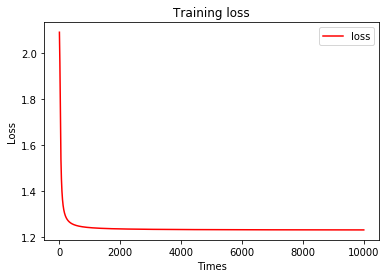

预测结果：
[[0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]]
真实结果：
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
准确率：42.30%


In [5]:
# 对模型进行测试
drow(history)
predict(parameters, X_test, y_test)